In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
%matplotlib inline

In [2]:
# seaborn customPalette setup
colors = ['#474b2a','#7b6732','#a87830','#97c17c','#2c8cc9']
customPalette = sns.set_palette(sns.color_palette(colors))

# IMPORT DATASETS

IMDB,TM,TN

In [3]:
# connect IMDB
con =sqlite3.connect('zippedData/im.db')

In [4]:
# IMDB READ

df_IMDB = pd.read_sql("""
SELECT b.primary_title AS title,b.genres AS genres,r.averagerating AS ratings,r.numvotes AS votes,b.start_year
FROM movie_ratings AS r
LEFT JOIN movie_basics AS b
ON r.movie_id = b.movie_id
ORDER BY ratings DESC
""",con)
df_IMDB.head()

,title,genres,ratings,votes,start_year
0,The Paternal Bond: Barbary Macaques,Documentary,10.0,5,2015
1,Requiem voor een Boom,Documentary,10.0,5,2016
2,Freeing Bernie Baran,"Crime,Documentary",10.0,5,2010
3,Hercule contre Hermès,Documentary,10.0,5,2012
4,Pick It Up! - Ska in the '90s,Documentary,10.0,5,2019


In [5]:
df_tn = pd.read_csv('zippedData/tn.movie_budgets.csv')
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
df_TM = pd.read_csv('zippedData/tmdb.movies.csv')
df_TM

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


# COMBINE DATASETS

df <br>
IMDB + TN + TM <br>
2000+ movies

dfl <br>
(df LARGE) <br>
IMDB + TM <br>
23000+ movies

In [7]:
df = pd.merge(df_IMDB,df_TM,how='inner',left_on='title',right_on='title')

In [8]:
df = df.drop_duplicates()

In [9]:
df = df.merge(df_tn,left_on='title',right_on='movie')

In [10]:
df = df.drop_duplicates(subset='title')

In [11]:
df.sample(5)

,title,genres,ratings,votes,start_year,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross
1478,The Guardian,"Action,Animation,Fantasy",7.1,581,2017,1507,[18],248649,en,The Guardian,0.840,2010-10-01,5.3,2,22,"Sep 29, 2006",The Guardian,"$70,000,000","$55,011,732","$94,973,540"
1442,Side Effects,"Crime,Drama,Mystery",7.1,168466,2013,8043,"[53, 80, 18]",109421,en,Side Effects,9.426,2013-02-08,6.5,1879,32,"Feb 8, 2013",Side Effects,"$30,000,000","$32,172,757","$66,742,138"
2518,The Christmas Candle,"Drama,Family",6.2,1538,2013,9229,"[18, 10751]",226354,en,The Christmas Candle,1.400,2013-11-22,6.0,15,45,"Nov 15, 2013",The Christmas Candle,"$7,000,000","$1,632,000","$1,933,829"
1019,"I, Tonya","Biography,Comedy,Drama",7.5,141668,2017,20704,[18],389015,en,"I, Tonya",15.407,2017-12-08,7.5,2904,83,"Dec 8, 2017","I, Tonya","$11,000,000","$30,014,534","$53,797,409"
741,How to Train Your Dragon 2,"Action,Adventure,Animation",7.8,278205,2014,11035,"[14, 28, 12, 16, 35, 10751]",82702,en,How to Train Your Dragon 2,27.106,2014-06-13,7.7,5589,99,"Jun 13, 2014",How to Train Your Dragon 2,"$145,000,000","$177,002,924","$614,586,270"


In [12]:
dfl = pd.merge(df_IMDB,df_TM,how='inner',left_on='title',right_on='title')

In [13]:
dfl.sample(5)

,title,genres,ratings,votes,start_year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
4989,The Founder,"Biography,Drama,History",7.2,97841,2016,17496,"[18, 36]",310307,en,The Founder,12.349,2017-01-20,7.0,2093
8016,Money,"Action,Crime",5.9,117,2019,18017,"[80, 53]",422874,en,Money,5.398,2016-04-06,5.4,63
3380,42,"Biography,Drama,Sport",7.5,77703,2013,7989,[18],109410,en,42,11.280,2013-04-12,7.0,1028
8352,The Angel,"Drama,Thriller",6.7,8238,2018,24157,"[28, 18, 36, 53, 10752]",468362,en,The Angel,10.194,2018-09-14,7.0,92
18682,All Hallows Eve: October 30th,"Horror,Thriller",3.8,81,2015,17329,[],360285,en,All Hallows Eve: October 30th,0.600,2015-06-16,2.0,1


# DATA CLEANING

### df data cleaning

In [14]:
df = df[['title','genres','ratings','votes','release_date_x','production_budget','worldwide_gross']]

In [15]:
df = df.dropna()

In [16]:
df.sample(5)

,title,genres,ratings,votes,release_date_x,production_budget,worldwide_gross
2534,San Andreas,"Action,Adventure,Drama",6.1,192750,2015-05-29,"$110,000,000","$456,258,539"
2538,30 Minutes or Less,"Action,Comedy,Crime",6.1,87254,2011-08-12,"$28,000,000","$40,966,716"
1049,The Next Three Days,"Action,Crime,Drama",7.4,168066,2010-11-19,"$30,000,000","$67,255,916"
1960,Ramona and Beezus,"Adventure,Comedy,Family",6.6,16086,2010-07-23,"$15,000,000","$27,469,621"
2031,Run All Night,"Action,Drama,Thriller",6.6,94131,2015-03-13,"$50,000,000","$66,961,644"


In [17]:
df['genres'] = df['genres'].apply(lambda x: x.split(','))

In [18]:
df

,title,genres,ratings,votes,release_date_x,production_budget,worldwide_gross
0,Crossroads,[Documentary],9.3,22,2017-10-14,"$12,000,000","$57,000,000"
12,The Runaways,[Adventure],9.2,47,2010-03-19,"$9,500,000","$5,278,632"
14,The Wall,[Documentary],9.2,8,2013-06-07,"$3,000,000","$4,495,262"
22,Survivor,"[Biography, Crime, Documentary]",9.0,45,2012-08-29,"$20,000,000","$1,703,281"
28,Frankenstein,[Drama],9.0,1832,2015-08-15,"$45,000,000","$112,006,296"
...,...,...,...,...,...,...,...
3356,Red River,[Horror],2.3,179,2011-05-05,"$3,000,000","$9,012,000"
3357,Snow White: A Deadly Summer,[Horror],2.2,679,2012-03-16,"$1,000,000",$0
3358,United Passions,"[Drama, History, Sport]",2.1,3878,2015-06-05,"$30,000,000","$168,832"
3359,Foodfight!,"[Action, Animation, Comedy]",1.9,8248,2013-05-07,"$45,000,000","$73,706"


In [19]:
df['genres'] = df['genres'].map(lambda x: random.choice(x))

In [20]:
objects_to_floats = ['production_budget','worldwide_gross']

for x in objects_to_floats:
    df[x] = df[x].str.replace('$',"")
    df[x] = df[x].str.replace(',',"")

In [21]:
df['genres'] = df['genres'].astype('category')

In [22]:
df['production_budget'] = df['production_budget'].astype('float')

In [23]:
# turn the budget to million
df['production_budget'] = df['production_budget']/1000000

In [24]:
df.rename(columns = {'production_budget':'production_budget_million'}, inplace = True)

In [25]:
df

,title,genres,ratings,votes,release_date_x,production_budget_million,worldwide_gross
0,Crossroads,Documentary,9.3,22,2017-10-14,12.0,57000000
12,The Runaways,Adventure,9.2,47,2010-03-19,9.5,5278632
14,The Wall,Documentary,9.2,8,2013-06-07,3.0,4495262
22,Survivor,Documentary,9.0,45,2012-08-29,20.0,1703281
28,Frankenstein,Drama,9.0,1832,2015-08-15,45.0,112006296
...,...,...,...,...,...,...,...
3356,Red River,Horror,2.3,179,2011-05-05,3.0,9012000
3357,Snow White: A Deadly Summer,Horror,2.2,679,2012-03-16,1.0,0
3358,United Passions,Sport,2.1,3878,2015-06-05,30.0,168832
3359,Foodfight!,Animation,1.9,8248,2013-05-07,45.0,73706


In [26]:
df['worldwide_gross'] = df['worldwide_gross'].astype('float')

In [27]:
df['release_date_x'] = pd.to_datetime(df['release_date_x'] )

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 3360
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   title                      1775 non-null   object        
 1   genres                     1775 non-null   category      
 2   ratings                    1775 non-null   float64       
 3   votes                      1775 non-null   int64         
 4   release_date_x             1775 non-null   datetime64[ns]
 5   production_budget_million  1775 non-null   float64       
 6   worldwide_gross            1775 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 99.6+ KB


### dfl data cleaning

In [29]:
dfl = dfl.drop_duplicates()

In [30]:
dfl = dfl.dropna()

In [31]:
dfl = dfl[['title','genres','ratings','votes','release_date']]

In [32]:
dfl['genres'] = dfl['genres'].apply(lambda x: x.split(','))

In [33]:
dfl['genres'] = dfl['genres'].map(lambda x: random.choice(x))

In [34]:
dfl = dfl.drop_duplicates()

In [35]:
dfl['release_date'] = pd.to_datetime(dfl['release_date'] )

In [36]:
dfl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19279 entries, 0 to 19948
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         19279 non-null  object        
 1   genres        19279 non-null  object        
 2   ratings       19279 non-null  float64       
 3   votes         19279 non-null  int64         
 4   release_date  19279 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 903.7+ KB


In [37]:
dfl.head()

,title,genres,ratings,votes,release_date
0,A Mediocre Documentary with Tom And Dan,Comedy,9.8,5,2018-05-03
1,Love on a Leash,Documentary,9.7,25,2013-08-13
3,Finger of God 2,Documentary,9.5,8,2018-12-04
4,"Hare Krishna! The Mantra, the Movement and the...",Documentary,9.5,829,2017-06-16
5,From the Ground Up,Documentary,9.4,53,2017-12-08


# DATA FILTER

In [38]:
df = df[(df['release_date_x'] >= '2010-01-01') & (df['release_date_x'] <= '2018-12-31')]

In [39]:
dfl = dfl[(dfl['release_date'] >= '2010-01-01') & (dfl['release_date'] <= '2018-12-31')]

In [40]:
dfl_genre_counts = dfl.groupby(by='genres')['genres'].count().sort_values(ascending=False).to_frame()

In [41]:
dfl_ratings = dfl[['genres','ratings']]

In [61]:
dfl_ratings.groupby('genres').mean().sort_values(by='ratings',ascending=False)

,ratings
genres,
News,7.090164
Documentary,7.086546
Biography,6.937678
History,6.923246
Music,6.838916
Sport,6.585621
War,6.320652
Musical,6.221667
Drama,6.144887


# TIME TO PLOT!

### df

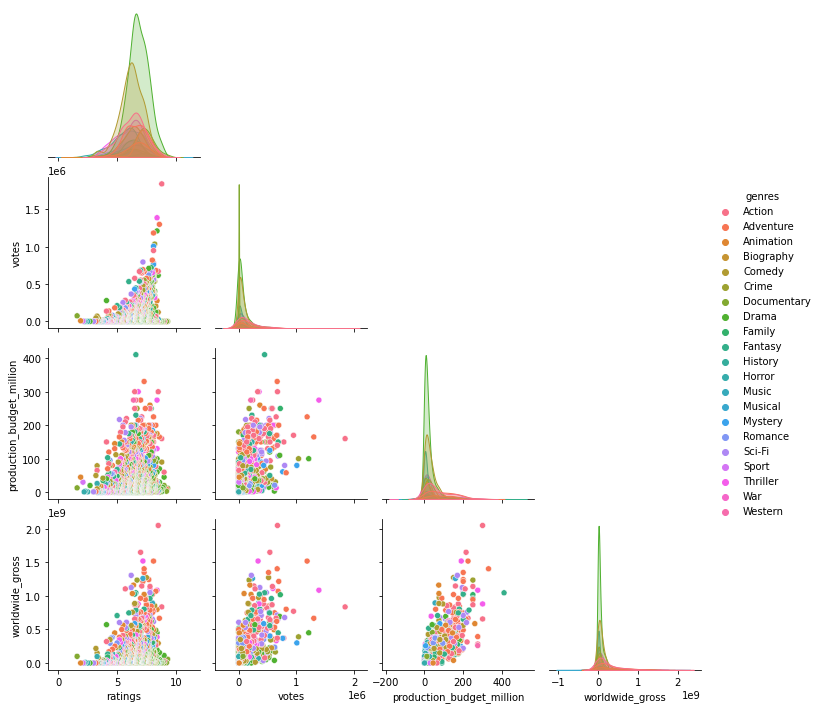

In [42]:
sns.pairplot(df, hue = 'genres', corner = True,palette=customPalette)

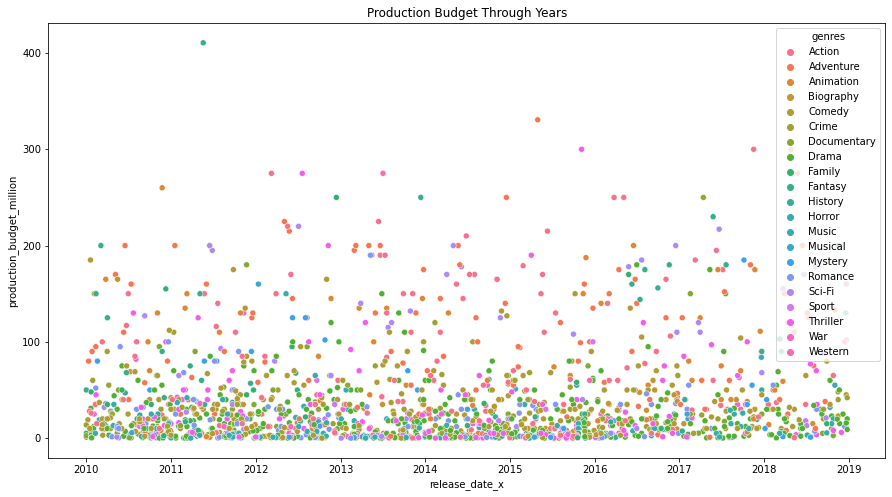

In [43]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'release_date_x', y = 'production_budget_million', hue = 'genres', data = df, ax = ax, palette=customPalette)
ax.set_title('Production Budget Through Years');

# no trend?

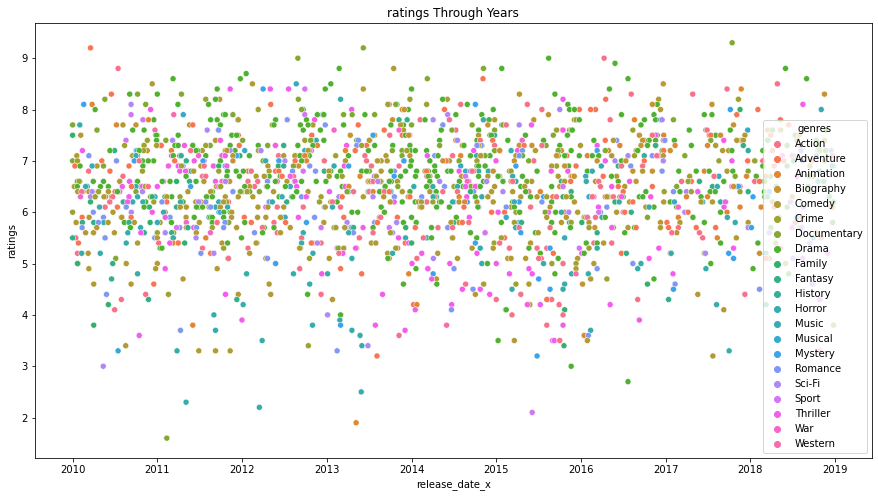

In [44]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'release_date_x', y = 'ratings', hue = 'genres', data = df, ax = ax, palette=customPalette)
ax.set_title('ratings Through Years');

# no trend?

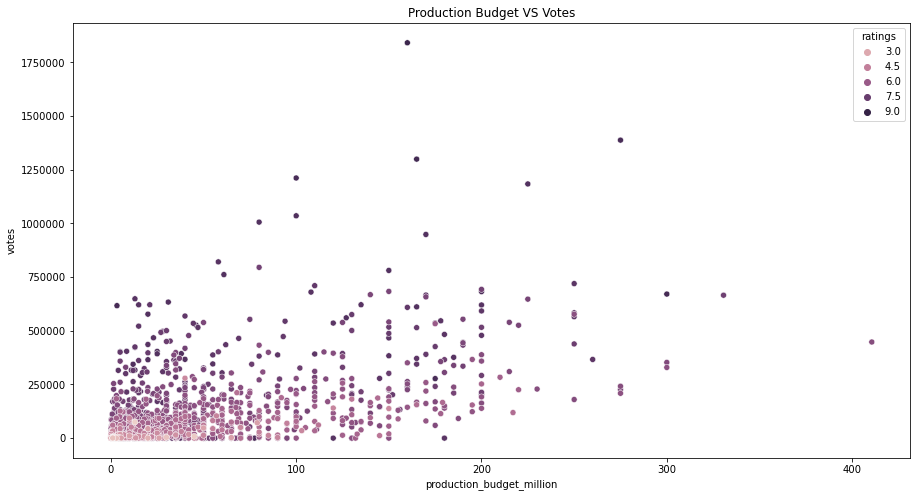

In [45]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'production_budget_million', y = 'votes', hue = 'ratings', data = df, ax = ax, palette=customPalette)
ax.set_title('Production Budget VS Votes')
ax.ticklabel_format(useOffset=False,style='plain');

### dfl

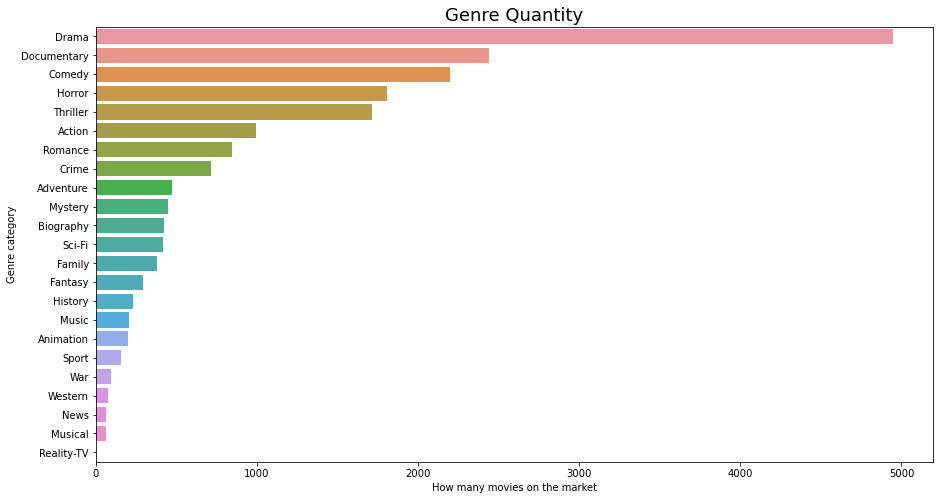

In [88]:
fig,ax = plt.subplots(figsize=(15,8))

sns.barplot(y = dfl_genre_counts.index, x = 'genres', data = dfl_genre_counts, ax = ax)
ax.set_title('Genre Quantity',fontsize = 18)
ax.set_xlabel('How many movies on the market')
ax.set_ylabel('Genre category');

# recommend drama

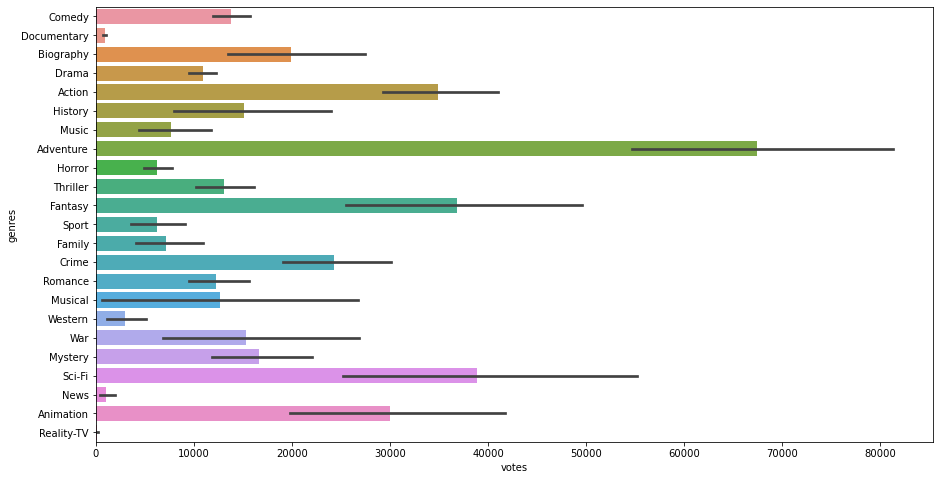

In [89]:
# which genre gets more votes/popularity

fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(x = 'votes', y = 'genres', data = dfl, ax = ax)
ax.set_title('Genre Popularity',fontsize = 18);

# pick action? 
# jeff got similar plot, so no recommendation on my plot

In [164]:
dflg = dfl.groupby('genres').mean()
dflg

,ratings,votes
genres,,
Action,5.411457,34842.832161
Adventure,5.936920,67395.873418
Animation,6.135859,29945.000000
Biography,6.937678,19839.336493
Comedy,5.732696,13739.035064
Crime,5.921599,24260.840112
Documentary,7.086546,878.061936
Drama,6.144887,10945.691593
Family,6.049606,7110.041995


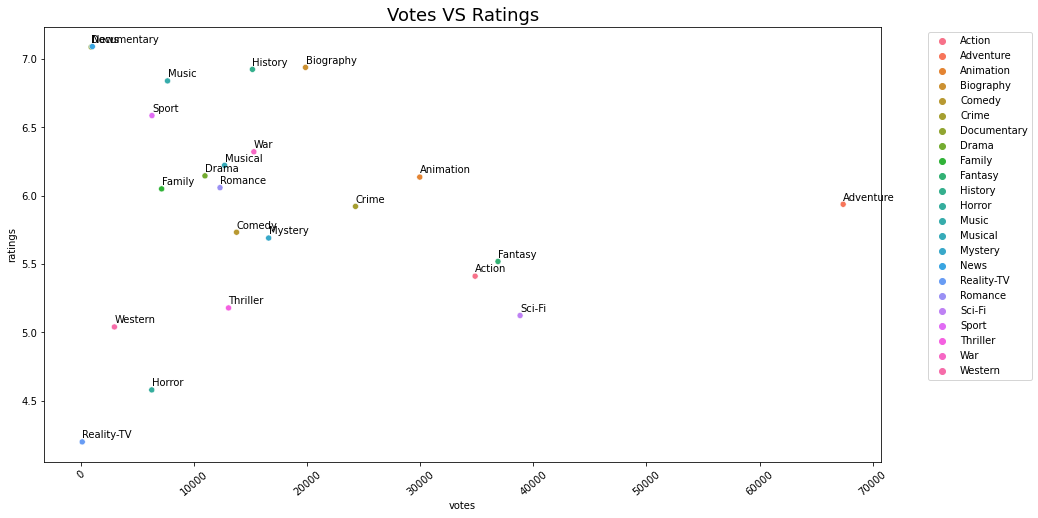

In [163]:
# cross votes/popularity and ratings, hue with genres


fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'votes', y = 'ratings', hue = dflg.index, data = dflg, ax = ax)
ax.set_title('Votes VS Ratings',fontsize = 18)
plt.xticks(rotation = 40)
ax.legend(bbox_to_anchor=(1.05, 1))

for i in range(dflg.shape[0]):
    plt.text(x = dflg.votes[i], y = dflg.ratings[i]+0.03, s = dflg.index[i])

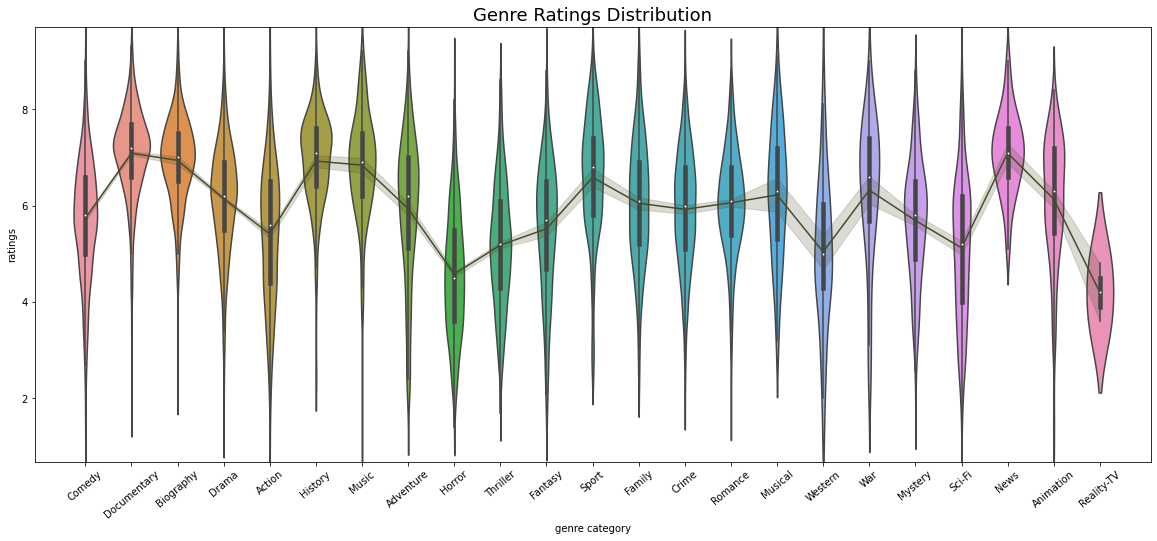

In [81]:
fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'ratings', x = 'genres', data = dfl_ratings, ax = ax, palette = customPalette)
ax.set_title('Genre Ratings Distribution',fontsize = 18)
ax.set_xlabel('genre category')
ax.set_ylabel('ratings')
plt.xticks(rotation = 40)

sns.lineplot(y = 'ratings', x = 'genres', data = dfl_ratings, ax = ax);

# choose Documentary similar to Biography
# choose comedy
# not Action, higher chance to get bad ratings

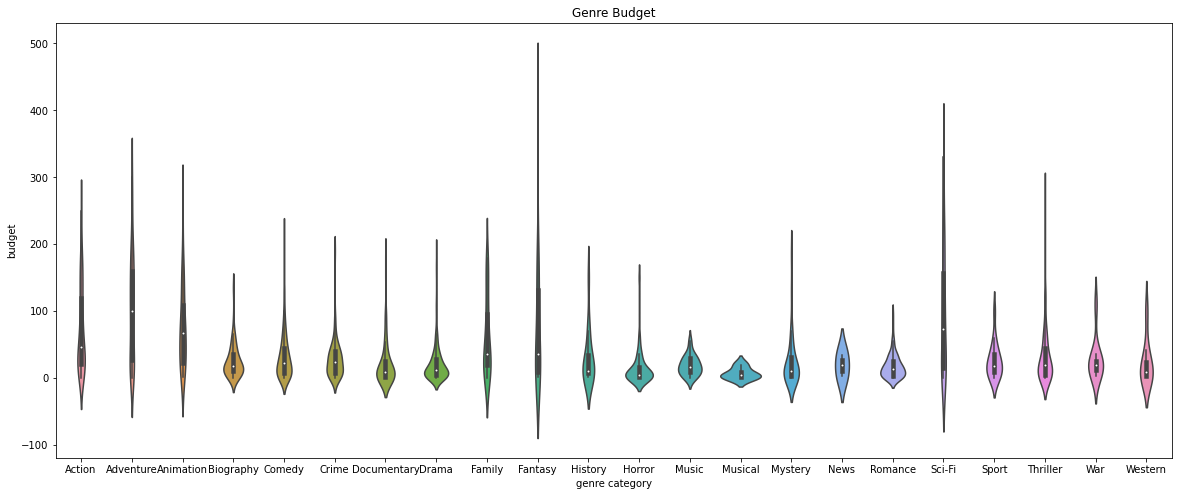

In [116]:
fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'production_budget_million', x = 'genres', data = df, ax = ax, palette = customPalette)
ax.set_title('Genre Budget')
ax.set_xlabel('genre category')
ax.set_ylabel('budget');

# Jeff got a better plot

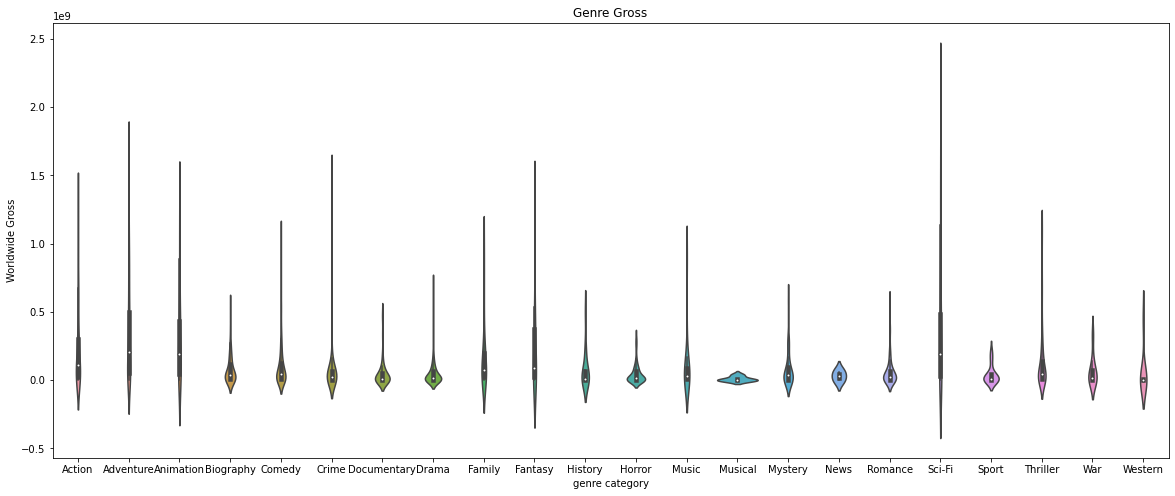

In [118]:
fig,ax = plt.subplots(figsize=(20,8))

sns.violinplot(y = 'worldwide_gross', x = 'genres', data = df, ax = ax, palette = customPalette)
ax.set_title('Genre Gross')
ax.set_xlabel('genre category')
ax.set_ylabel('Worldwide Gross');

# Jeff got this too

# TIME SERIES PLOT - TRENDS

In [165]:
selected_genre = ['Animation','Adventure','Sci-Fi','Drama','Documentary','Biography']

In [172]:
# dfls means df - large dataset - selected genre
dfls = dfl[dfl['genres'].isin(selected_genre)]
dfls

,title,genres,ratings,votes,release_date
1,Love on a Leash,Documentary,9.7,25,2013-08-13
3,Finger of God 2,Documentary,9.5,8,2018-12-04
4,"Hare Krishna! The Mantra, the Movement and the...",Documentary,9.5,829,2017-06-16
5,From the Ground Up,Documentary,9.4,53,2017-12-08
6,Standing Up,Biography,9.4,5,2013-08-16
...,...,...,...,...,...
19923,Hornet,Sci-Fi,1.7,144,2018-12-18
19926,Alien Predator,Adventure,1.7,653,2018-09-11
19934,Izzie's Way Home,Animation,1.6,251,2016-05-17
19937,Justin Bieber: Never Say Never,Documentary,1.6,74978,2011-02-11


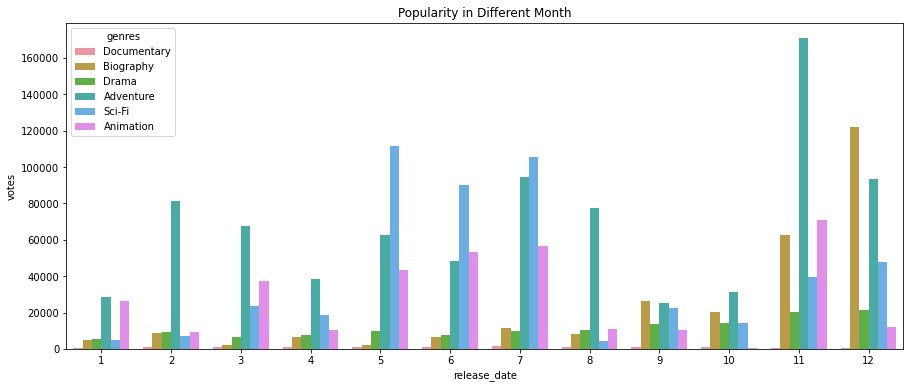

In [205]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'votes', hue = 'genres', data = dfls, ci = None, ax = ax)
ax.set_title('Popularity in Different Month');

# people like to watch movies in 5/6/7/11/12
# recommend adventure in 11, sci-fi in 5/6/7
# biography in 12

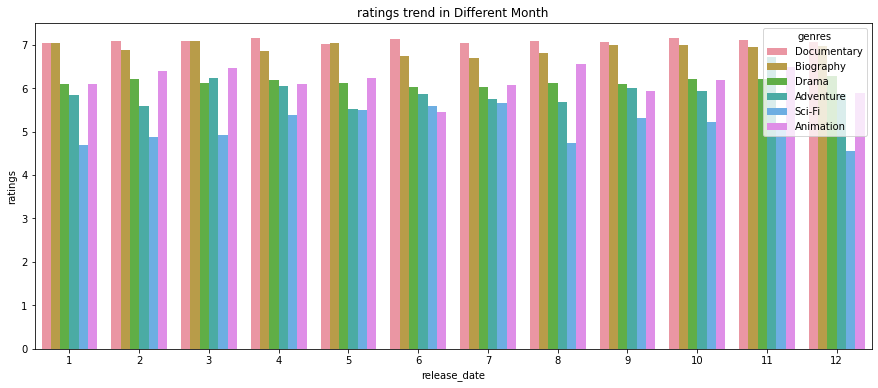

In [206]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = pd.DatetimeIndex(dfls.release_date).month, y = 'ratings', hue = 'genres', data = dfls, ci = None, ax = ax)
ax.set_title('ratings trend in Different Month');

# some genre obviously get better ratings in certain month
# need to seperate to grids

In [203]:
# dfs means df - budget dataset - selected genre
dfs = df[df['genres'].isin(selected_genre)]
dfs.genres.unique()

['Documentary', 'Adventure', 'Drama', 'Biography', 'Animation', 'Sci-Fi']
Categories (6, object): ['Documentary', 'Adventure', 'Drama', 'Biography', 'Animation', 'Sci-Fi']

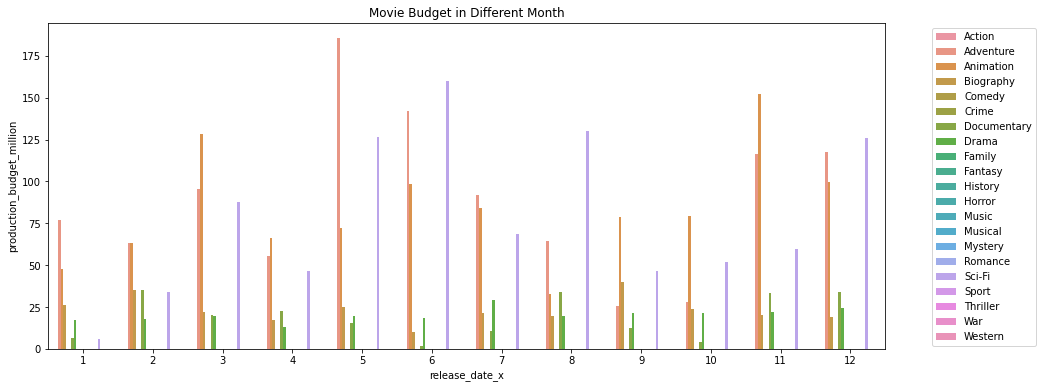

In [204]:
fig,ax = plt.subplots(figsize=(15,6))
sns.barplot(x = pd.DatetimeIndex(dfs.release_date_x).month, y = 'production_budget_million', hue = 'genres', data = dfs, ci = None, ax = ax)
ax.set_title('Movie Budget in Different Month')
ax.legend(bbox_to_anchor=(1.05, 1));

# Movie in 

In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x = 'votes', y = 'ratings', hue = dflg.release, data = dfl, ax = ax)
ax.set_title('Votes VS Ratings',fontsize = 18)
plt.xticks(rotation = 40)
ax.legend(bbox_to_anchor=(1.05, 1))

for i in range(dflg.shape[0]):
    plt.text(x = dflg.votes[i], y = dflg.ratings[i]+0.03, s = dflg.index[i])